In [1]:
# importing tools 
import s3fs
import xarray as xr
import numpy as np 
import matplotlib.pyplot as plt 
import cmocean
import math
from matplotlib.patches import Ellipse
#for removing warnings
import warnings

In [2]:
# open the data with s3fs from the databucket 
fsg = s3fs.S3FileSystem(anon=False,
      client_kwargs={
         'endpoint_url': 'https://karen.uiogeo-apps.sigma2.no'
      })
data_path1 = 's3://data/CREG12.L75-REF08_mesh_zgr.zarr'
data_path2 = 's3://data/vel_dataIII.zarr/vel_dataIII.zarr'

remote_files1 = fsg.glob(data_path1)
remote_files2 = fsg.glob(data_path2)

store1 = s3fs.S3Map(root=data_path1, s3=fsg, check=False)
store2 = s3fs.S3Map(root=data_path2, s3=fsg, check=False)

dzz = xr.open_zarr(store=store1, consolidated=True)
dv = xr.open_zarr(store=store2, consolidated=True)

In [3]:
bathym = dzz.mbathy.isel(x=slice(200,1400),y=slice(650,1800)).squeeze(axis=0)

In [4]:
def open_s3fs(path):
    # open the data with s3fs from the databucket 
    fsg = s3fs.S3FileSystem(anon=False,
      client_kwargs={
         'endpoint_url': 'https://karen.uiogeo-apps.sigma2.no'
      })
    data_path = f's3://data/{path}'
    remote_files = fsg.glob(data_path)
    fileset = [fsg.open(file) for file in remote_files]
    #open the dataset 
    dset = xr.open_mfdataset(fileset, 
                             #combine='by_coords',
                             compat='override')
    return dset

In [5]:
d15 = open_s3fs('mooring_barents/A-TWAIN_2015-2017_AT200-3_22-118m_ACDP_16640.nc')
d13 = open_s3fs('mooring_barents/A-TWAIN_2013-2015_AT200-2_14-121m_ACDP_16640.nc')
d17 = open_s3fs('mooring_barents/A-TWAIN_2017-2019_AT200-4_20-167m_ACDP_16640.nc')

y1 = open_s3fs('mooring_yermark/Y1.nc')
y2 = open_s3fs('mooring_yermark/Y2.nc')
y3 = open_s3fs('mooring_yermark/Y3.nc')

MB = open_s3fs('mooring_lofoten/PROVOLO_Mooring_MB.nc')
MW = open_s3fs('mooring_lofoten/PROVOLO_Mooring_MW.nc')
MN = open_s3fs('mooring_lofoten/PROVOLO_Mooring_MN.nc')
MS = open_s3fs('mooring_lofoten/PROVOLO_Mooring_MS.nc')

ANO18 = open_s3fs('moorings_/AON_Sig_ADCP_BS3_2016_2018.nc')
ANO16 = open_s3fs('moorings_/AON_LR_ADCP_BS3_2014_2016.nc')
ANO14 = open_s3fs('moorings_/AON_LR_ADCP_BS3_2013_2014.nc')

In [6]:
grid = open_s3fs('smooth_grid_karen.nc')

In [7]:
p_list = [(31.13247,81.24202),
          (31.13533,81.24255),
          (31.14506,81.24587)
          ,(011.1189, 69.5289),
          (013.16845,68.58759),
          (013.19866,68.56109),
          (012.45082,68.50128),
          (5.48733,80.03876),
          (5.56333,79.44093)]
moor_l = [(836, 440),
            (838, 440),
            (836, 439),
            (915, 157),
            (930, 149),
            (932, 147),
            (929, 142),
            (774, 344+6),
            (766, 358+6),
            (773, 346+6),
            (334, 978),
            (334, 978),
            (334, 978)]
c_list = ['gold', 'orangered', 'g',
          'r', 'm', 'y','tab:orange',
          'tab:pink', 'limegreen', 'maroon', 
          'dodgerblue', 'c', 'peru','deeppink']

In [8]:
# Barents sea
u13 = d13.UCUR.fillna(0).squeeze(axis=0)
v13 = d13.VCUR.fillna(0).squeeze(axis=0)
u15 = d15.UCUR.fillna(0).squeeze(axis=0)
v15 = d15.VCUR.fillna(0).squeeze(axis=0)
u17 = d17.UCUR.fillna(0).squeeze(axis=0)
v17 = d17.VCUR.fillna(0).squeeze(axis=0)

# Lofoten
ub = MB.u.isel(DEPTH=slice(19,-1)).fillna(0)
vb = MB.v.isel(DEPTH=slice(19,-1)).fillna(0)
uw = MW.u.isel(DEPTH=slice(12,-1), TIME=slice(1,-1)).fillna(0)
vw = MW.v.isel(DEPTH=slice(12,-1), TIME=slice(1,-1)).fillna(0)
un = MN.u.isel(DEPTH=slice(7,-1)).fillna(0)
vn = MN.v.isel(DEPTH=slice(7,-1)).fillna(0)
us = MS.u.isel(DEPTH=slice(8,-1)).fillna(0)
vs = MS.v.isel(DEPTH=slice(8,-1)).fillna(0)

# Yermark
u1 = y1.u.isel(DEPTH=slice(11,255), TIME=slice(1,-1)).fillna(0)
v1 = y1.v.isel(DEPTH=slice(11,255), TIME=slice(1,-1)).fillna(0)
u2 = y2.u.isel(DEPTH=slice(4,150), TIME=slice(1,-1)).fillna(0)
v2 = y2.v.isel(DEPTH=slice(4,150), TIME=slice(1,-1)).fillna(0)
u3 = y3.u.isel(DEPTH=slice(11,220), TIME=slice(1,-1)).fillna(0)
v3 = y3.v.isel(DEPTH=slice(11,220), TIME=slice(1,-1)).fillna(0)

# Beaufort
'sliter med å finne ut hvordan få gode oversiktlige'
u14 = ANO14.UCUR.isel(TIME=slice(167,-1),BINDEPTH=slice(0,11)).fillna(0)
v14 = ANO14.VCUR.isel(TIME=slice(167,-1),BINDEPTH=slice(0,11)).fillna(0)
u16 = ANO16.UCUR.isel(BINDEPTH=slice(1,11)).fillna(0)
v16 = ANO16.VCUR.isel(BINDEPTH=slice(1,11)).fillna(0)
u18 = ANO18.UCUR.interpolate_na(dim='BINDEPTH', method='nearest', use_coordinate=False)
v18 = ANO18.VCUR.interpolate_na(dim='BINDEPTH', method='nearest', use_coordinate=False)
u18 = u18.isel(BINDEPTH=slice(1,-1)).fillna(0)
v18 = v18.isel(BINDEPTH=slice(1,-1)).fillna(0)

In [9]:
dyp = grid.depth.isel(x=slice(200,1400),y=slice(650,1800))

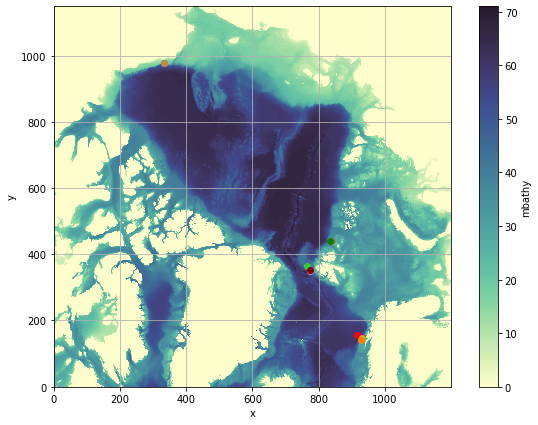

In [10]:
fig, ax = plt.subplots(figsize=(10,7))
bathym.plot(cmap=plt.get_cmap(cmocean.cm.deep))
for i,p in enumerate(moor_l):
    ax.plot(p[0], p[1], marker='o', color=c_list[i])
ax.grid('on')
ax.set_aspect('equal')
#plt.savefig('mooring_location_level.pdf', dpi = 300)

In [11]:
vel_l = [(u13,v13),(u15,v15),(u17,v17), 
         (ub,vb),(uw,vw),(un,vn),(us,vs),
         (u1,v1),(u2,v2),(u3,v3)
         ,(u14,v14),(u16,v16),(u18,v18)]
vec_l = []

In [12]:
def ellipser_nDEPTH(u,v,depth):
    
    covm = np.cov(np.vstack([u.isel(nDEPTH=depth).values,v.isel(nDEPTH=depth).values]))
    print(covm)
    values_, vectors_ = np.linalg.eig(covm)
    order = values_.argsort()[::-1]
    values, vectors = values_[order], vectors_[:, order]
    print('vec: ',vectors, 'val: ', values)
    
    # ellipser :
    major = np.sqrt(values[0])
    minor = np.sqrt(np.abs(values[1]))

    # The anti-clockwise angle to rotate our ellipse by 
    vx, vy = vectors[:,0][0], vectors[:,0][1]
    theta = np.arctan2(vy, vx)*(180/math.pi)
   
    return major, minor, theta, vectors

In [13]:
def ellipser_DEPTH(u,v,depth):
    
    s = 1e2
        
    covm = np.cov(np.vstack([u.isel(DEPTH=depth).values,v.isel(DEPTH=depth).values]))
    
    print(covm)
    values_, vectors_ = np.linalg.eig(covm)
    order = values_.argsort()[::-1]
    values, vectors = values_[order], vectors_[:, order]
    print('vec: ',vectors, 'val: ', values)
    
    # ellipser :
    major = np.sqrt(values[0])*s
    minor = np.sqrt(np.abs(values[1]))*s

    # The anti-clockwise angle to rotate our ellipse by 
    vx, vy = vectors[:,0][0], vectors[:,0][1]
    #theta = np.arctan(vy/vx)#*(180/math.pi)
    theta = np.arctan2(vy, vx)*(180/math.pi)
   
    return major, minor, theta, vectors

In [14]:
def ellipser_BINDEPTH(u,v,depth):
    
    s=100
    
    covm = np.cov(np.vstack([u.isel(BINDEPTH=depth).values,v.isel(BINDEPTH=depth).values]))
    print(covm)
    values_, vectors_ = np.linalg.eig(covm)
    order = values_.argsort()[::-1]
    values, vectors = values_[order], vectors_[:, order]
    print('vec: ',vectors, 'val: ', values)
    
    # ellipser :
    major = np.sqrt(values[0])*s
    minor = np.sqrt(np.abs(values[1]))*s

    # The anti-clockwise angle to rotate our ellipse by 
    vx, vy = vectors[:,0][0], vectors[:,0][1]
    theta = np.arctan2(vy, vx)*(180/math.pi)
   
    return major, minor, theta, vectors

## Mooring Barents sea

In [16]:
#u.DEPTH.isel(TIME=50,nDEPTH=10).values

[[332.39007543 -33.16522912]
 [-33.16522912 438.64949726]]
vec:  [[ 0.27541674 -0.96132493]
 [-0.96132493 -0.27541674]] val:  [448.15123695 322.88833574]
0.54
Ellipse(xy=(836, 440), width=42.339165648393475, height=35.93818780853956, angle=-74.01314941416945)
[[271.87860277 -13.55415113]
 [-13.55415113 340.75053557]]
vec:  [[ 0.1863939 -0.9824751]
 [-0.9824751 -0.1863939]] val:  [343.32201159 269.30712674]
0.53
Ellipse(xy=(838, 440), width=37.05790126771052, height=32.8211594397052, angle=-79.25758907730533)
[[347.16445786 -35.7823527 ]
 [-35.7823527  406.29518142]]
vec:  [[ 0.42605245 -0.90469846]
 [-0.90469846 -0.42605245]] val:  [423.14627558 330.3133637 ]
0.53
Ellipse(xy=(836, 439), width=41.141039149668, height=36.349050259825155, angle=-64.78270179177487)


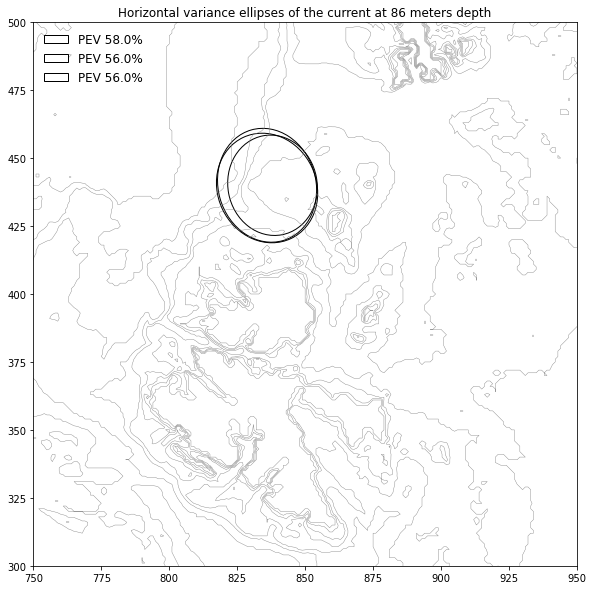

In [17]:
# Plot level 1
fig, ax = plt.subplots(1,1,figsize=(10,10))
plt.title(f'Horizontal variance ellipses of the current at 86 meters depth')
ax.contour(bathym, colors='grey',levels=8, linewidths=0.4)

for i in [0,1,2]:
    vel = vel_l[i]
    m = moor_l[i]
    u = vel[0]
    v = vel[1]
    y = m[0]
    x = m[1]
    depth = 10
    
    maj_, min_, theta_, vec = ellipser_nDEPTH(u,v,depth)
    PVE = round((maj_**2/(maj_**2+ min_**2))*100,0) 
    velocity = round((maj_/(maj_+ min_)),2) 
    print(velocity)
    ellipse = Ellipse((y,x), 
            width = maj_*2, 
            height = min_*2,
            angle = theta_,
            facecolor = 'none',
            edgecolor='k',
            label= f'PEV {PVE}%'
                     )
    print(ellipse)
    vec_l.append(vec)
    ax.add_patch(ellipse)
    ax.legend(frameon=False, fontsize=12, loc="upper left") 
    
ax.set_xlim(750,950)
ax.set_ylim(300,500)
ax.set_aspect('equal')
plt.savefig('moor_barents_ellipse.pdf', dpi = 300)

## Moorings in Lofoten basin

In [18]:
vel_l[4][0].DEPTH[100].values

array(1200.)

3
[[ 0.00616119 -0.00059685]
 [-0.00059685  0.0054571 ]]
vec:  [[ 0.86834446  0.49596158]
 [-0.49596158  0.86834446]] val:  [0.00650209 0.0051162 ]
4
[[0.00177767 0.00190658]
 [0.00190658 0.0030672 ]]
vec:  [[-0.58294305 -0.81251301]
 [-0.81251301  0.58294305]] val:  [0.00443508 0.00040979]


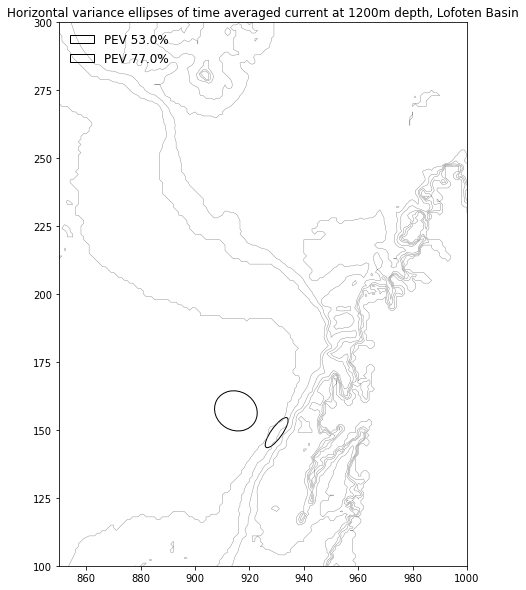

In [19]:
# Plot level 1
fig, ax = plt.subplots(1,1,figsize=(10,10))
plt.title(f'Horizontal variance ellipses of time averaged current at 1200m depth, Lofoten Basin')
ax.contour(bathym, colors='grey',levels=8, linewidths=0.4)

for i in [3,4]:
    print(i)
    vel = vel_l[i]
    m = moor_l[i]
    u = vel[0]
    v = vel[1]
    y = m[0]
    x = m[1]
    depth = 100
    
    maj_, min_, theta_, vec = ellipser_DEPTH(u,v,depth)
    PVE = round((maj_)/(maj_+min_)*100,0) 
    ellipse = Ellipse((y,x), 
            width = maj_*2, 
            height = min_*2,
            angle = theta_,
            facecolor = 'none',
            edgecolor='k',
            label = f'PEV {PVE}%'
                     )
    ax.add_patch(ellipse)
    vec_l.append(vec)
    ax.legend(frameon=False, fontsize=12, loc="upper left") 
    
ax.set_xlim(850,1000)
ax.set_ylim(100,300)
ax.set_aspect('equal')
plt.show()
#plt.savefig('moor_Lofoten_ellipse.pdf', dpi = 300)

In [20]:
vel_l[5][0].DEPTH[45].values

array(600.)

5
[[0.01251528 0.00258159]
 [0.00258159 0.00566636]]
vec:  [[ 0.94829195 -0.3173994 ]
 [ 0.3173994   0.94829195]] val:  [0.01337935 0.00480228]


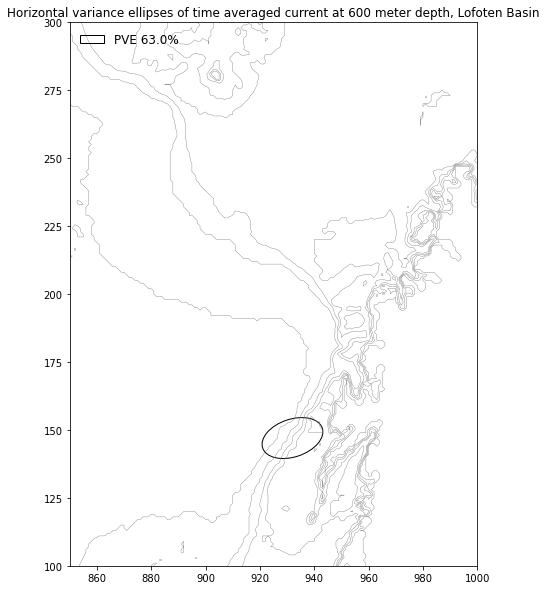

In [21]:
# Plot level 1
fig, ax = plt.subplots(1,1,figsize=(10,10))
plt.title(f'Horizontal variance ellipses of time averaged current at 600 meter depth, Lofoten Basin')
ax.contour(bathym, colors='grey',levels=8, linewidths=0.4)

for i in [5]:
    print(i)
    vel = vel_l[i]
    m = moor_l[i]
    u = vel[0]
    v = vel[1]
    y = m[0]
    x = m[1]
    depth = 45
    
    maj_, min_, theta_, vec = ellipser_DEPTH(u,v,depth)
    PVE = round((maj_)/(maj_+min_)*100,0) 
    ellipse = Ellipse((y,x), 
            width = maj_*2, 
            height = min_*2,
            angle = theta_,
            facecolor = 'none',
            edgecolor='k',
            label = f'PVE {PVE}%'
                     )
    ax.add_patch(ellipse)
    ax.legend(frameon=False, fontsize=12, loc="upper left") 
    vec_l.append(vec)
    
ax.set_xlim(850,1000)
ax.set_ylim(100,300)
ax.set_aspect('equal')
plt.show()

In [22]:
vec_l

[array([[ 0.27541674, -0.96132493],
        [-0.96132493, -0.27541674]]),
 array([[ 0.1863939, -0.9824751],
        [-0.9824751, -0.1863939]]),
 array([[ 0.42605245, -0.90469846],
        [-0.90469846, -0.42605245]]),
 array([[ 0.86834446,  0.49596158],
        [-0.49596158,  0.86834446]]),
 array([[-0.58294305, -0.81251301],
        [-0.81251301,  0.58294305]]),
 array([[ 0.94829195, -0.3173994 ],
        [ 0.3173994 ,  0.94829195]])]

3
[[0.00775443 0.00095931]
 [0.00095931 0.01624426]]
vec:  [[-0.11089982 -0.99383159]
 [-0.99383159  0.11089982]] val:  [0.01635131 0.00764739]
4
[[0.00881811 0.00796697]
 [0.00796697 0.01378123]]
vec:  [[-0.5927104  -0.80541566]
 [-0.80541566  0.5927104 ]] val:  [0.01964417 0.00295517]
5
[[0.03314956 0.03006593]
 [0.03006593 0.03667354]]
vec:  [[-0.68611083 -0.72749703]
 [-0.72749703  0.68611083]] val:  [0.06502907 0.00479404]
6
[[0.0322705  0.02081542]
 [0.02081542 0.0286371 ]]
vec:  [[ 0.73720624 -0.67566779]
 [ 0.67566779  0.73720624]] val:  [0.05134835 0.00955925]


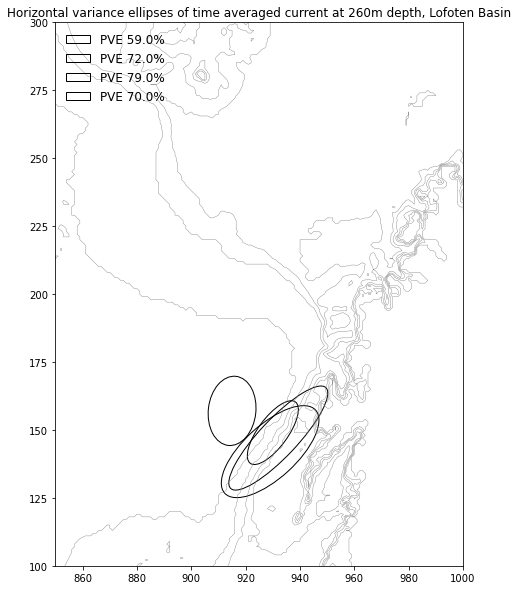

In [63]:
# Plot level 1
fig, ax = plt.subplots(1,1,figsize=(10,10))
plt.title(f'Horizontal variance ellipses of time averaged current at 260m depth, Lofoten Basin')
ax.contour(bathym, colors='grey',levels=8, linewidths=0.4)

for i in [3,4,5,6]:
    print(i)
    vel = vel_l[i]
    m = moor_l[i]
    u = vel[0]
    v = vel[1]
    y = m[0]
    x = m[1]
    depth = 0
    
    maj_, min_, theta_, vec = ellipser_DEPTH(u,v,depth)
    PVE = round((maj_)/(maj_+min_)*100,0)
    ellipse = Ellipse((y,x), 
            width = maj_*2, 
            height = min_*2,
            angle = theta_,
            facecolor = 'none',
            edgecolor='k',
            label = f'PVE {PVE}%'
                     )
    ax.add_patch(ellipse)
    ax.legend(frameon=False, fontsize=12, loc="upper left") 

ax.set_xlim(850,1000)
ax.set_ylim(100,300)
ax.set_aspect('equal')
plt.savefig('moor_Lofoten_ellipse.pdf', dpi = 300)

## Moorings Yermark

In [23]:
vel_l[9][0].DEPTH[140].values

array(745.66019418)

7
[[ 0.01732654 -0.0006705 ]
 [-0.0006705   0.01761845]]
vec:  [[ 0.62741291 -0.77868674]
 [-0.77868674 -0.62741291]] val:  [0.01815869 0.0167863 ]
Ellipse(xy=(774, 350), width=26.950840095171984, height=25.91238748354795, angle=-51.14049108908952)
8
[[0.0162784  0.0011626 ]
 [0.0011626  0.01695075]]
vec:  [[-0.60092325 -0.79930673]
 [-0.79930673  0.60092325]] val:  [0.0178248  0.01540435]
Ellipse(xy=(766, 364), width=26.701910564670868, height=24.82285245816764, angle=-126.93604896302391)
9
[[ 0.01404945 -0.00123508]
 [-0.00123508  0.01460441]]
vec:  [[ 0.62481889 -0.78076972]
 [-0.78076972 -0.62481889]] val:  [0.0155928  0.01306107]
Ellipse(xy=(773, 352), width=24.974223296179225, height=22.857005736354676, angle=-51.331104081926)


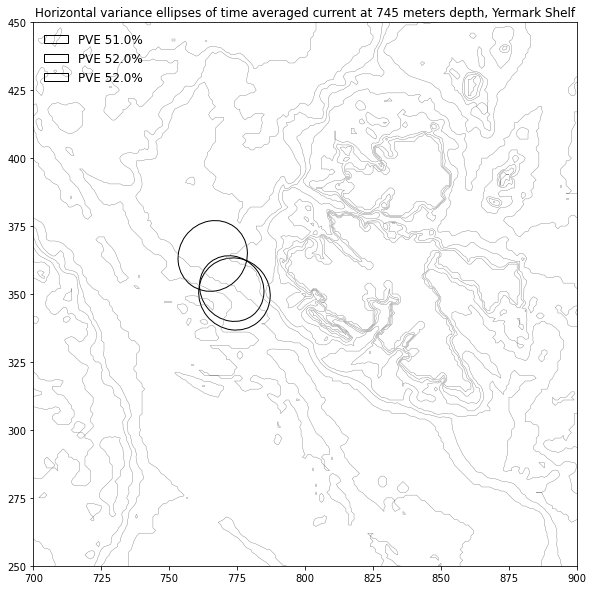

In [24]:
# Plot level 1
fig, ax = plt.subplots(1,1,figsize=(10,10))
plt.title(f'Horizontal variance ellipses of time averaged current at 745 meters depth, Yermark Shelf')
ax.contour(bathym, colors='grey',levels=8, linewidths=0.4)

for i in [7,8,9]:
    print(i)
    vel = vel_l[i]
    m = moor_l[i]
    u = vel[0]
    v = vel[1]
    y = m[0]
    x = m[1]
    depth = 42

    #maj_, min_, theta_ = ellipser_nDEPTH(u,v,depth)
    maj_, min_, theta_, vec = ellipser_DEPTH(u,v,depth)
    PVE = round((maj_)/(maj_+min_)*100,0)
    ellipse = Ellipse((y,x), 
            width = maj_*2, 
            height = min_*2,
            angle = theta_,
            facecolor = 'none',
            edgecolor='k',
            label = f'PVE {PVE}%'
                     )
    print(ellipse)
    vec_l.append(vec)
    ax.add_patch(ellipse)
    ax.legend(frameon=False, fontsize=12, loc="upper left") 
    
ax.set_xlim(700,900)
ax.set_ylim(250,450)
ax.set_aspect('equal')
plt.savefig('moor_yermark_ellipse262m.pdf', dpi = 300)

## Moorings Beaufort sea

In [25]:
vel_l[12][0].BINDEPTH[9].values

array(92.4995, dtype=float32)

[[ 0.02942318 -0.02255391]
 [-0.02255391  0.022193  ]]
vec:  [[ 0.76100801  0.64874249]
 [-0.64874249  0.76100801]] val:  [0.04864989 0.00296629]
Ellipse(xy=(334, 978), width=44.1134401505896, height=10.892732030977838, angle=-40.44685780260724)
[[ 0.02924355 -0.02042314]
 [-0.02042314  0.01726024]]
vec:  [[ 0.80047202  0.59937012]
 [-0.59937012  0.80047202]] val:  [0.0445358  0.00196799]
Ellipse(xy=(334, 978), width=42.207013554573805, height=8.872401432243882, angle=-36.82479923024254)
[[ 0.03236038 -0.01516241]
 [-0.01516241  0.00932714]]
vec:  [[ 0.89578352  0.44449059]
 [-0.44449059  0.89578352]] val:  [0.03988401 0.00180351]
Ellipse(xy=(334, 978), width=39.94196509907251, height=8.493542278004975, angle=-26.390751329701658)


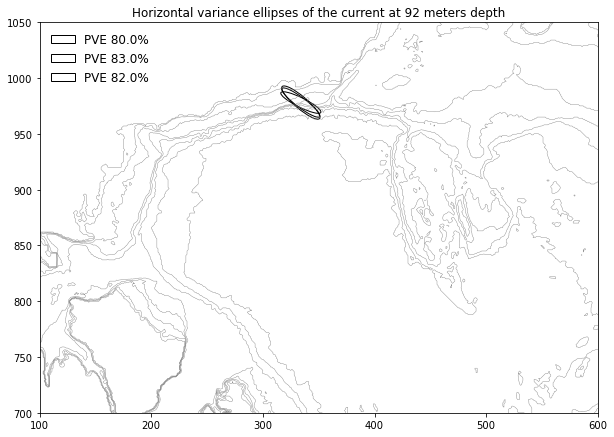

In [26]:
# Plot level 1
fig, ax = plt.subplots(1,1,figsize=(10,10))
plt.title(f'Horizontal variance ellipses of the current at 92 meters depth')
ax.contour(bathym, colors='grey',levels=8, linewidths=0.4)

for i in [10,11,12]:
    vel = vel_l[i]
    m = moor_l[i]
    u = vel[0]
    v = vel[1]
    y = m[0]
    x = m[1]
    depth = 2

    maj_, min_, theta_, vec = ellipser_BINDEPTH(u,v,depth)
    PVE = round((maj_)/(maj_+min_)*100,0)
    ellipse = Ellipse((y,x), 
            width = maj_*2, 
            height = min_*2,
            angle = theta_,
            facecolor = 'none',
            edgecolor='k',
            label = f'PVE {PVE}%'
                     )
    print(ellipse)
    vec_l.append(vec)
    ax.add_patch(ellipse)
    ax.legend(frameon=False, fontsize=12, loc="upper left")

ax.set_xlim(100,600)
ax.set_ylim(700,1050)
ax.set_aspect('equal')
plt.savefig('moor_beaufort_ellipse.pdf', dpi = 300)

In [27]:
vec_l

[array([[ 0.27541674, -0.96132493],
        [-0.96132493, -0.27541674]]),
 array([[ 0.1863939, -0.9824751],
        [-0.9824751, -0.1863939]]),
 array([[ 0.42605245, -0.90469846],
        [-0.90469846, -0.42605245]]),
 array([[ 0.86834446,  0.49596158],
        [-0.49596158,  0.86834446]]),
 array([[-0.58294305, -0.81251301],
        [-0.81251301,  0.58294305]]),
 array([[ 0.94829195, -0.3173994 ],
        [ 0.3173994 ,  0.94829195]]),
 array([[ 0.62741291, -0.77868674],
        [-0.77868674, -0.62741291]]),
 array([[-0.60092325, -0.79930673],
        [-0.79930673,  0.60092325]]),
 array([[ 0.62481889, -0.78076972],
        [-0.78076972, -0.62481889]]),
 array([[ 0.76100801,  0.64874249],
        [-0.64874249,  0.76100801]]),
 array([[ 0.80047202,  0.59937012],
        [-0.59937012,  0.80047202]]),
 array([[ 0.89578352,  0.44449059],
        [-0.44449059,  0.89578352]])]

# Vertical PC

In [29]:
def PCz(data):
    cov = np.cov(data.T, bias=True) # uten .T ble den en 73x73 matrise     
    values, vectors = np.linalg.eig(cov)
    order = values.argsort()[::-1]
    values, vectors = values[order], vectors[:, order]
    
    return  values, vectors 

In [35]:
len(vel_l[0][0][0])

26

In [42]:
print(vec_l[0])
print(vec_l[0][:,0])

[[ 0.27541674 -0.96132493]
 [-0.96132493 -0.27541674]]
[ 0.27541674 -0.96132493]


In [64]:
ort = np.zeros((len(U[0]),len(U)))
ort.shape
U.T.shape

(26, 69418)

In [77]:
def PCz_op(up,vp,vec):
    
    #par = np.zeros((len(up),len(up[0])))
    #ort = np.zeros((len(up),len(up[0])))
    #for t in range(len(up)):
    #    par[t] = (up[t]*vec[0]+ vp[t]*vec[1])/np.sqrt((vec[0]**2 + vec[1]**2))
    #    ort[t] = (-up[t]*vec[1]  + vp[t]*vec[0])/np.sqrt((vec[0]**2 + vec[1]**2))
    
    p = up*vec[0] +  vp*vec[1]
    o = -up*vec[1] +  vp*vec[0]

    val_p, vec_p = PCz(p) 
    val_o, vec_o = PCz(o) 
    
    EOFp = (np.sqrt(val_p[0])*vec_p[:,0])
    EOFo = (np.sqrt(val_o[0])*vec_o[:,0])
    
    PVEp = int(round(val_p[0]/np.sum(val_p)*100,0))
    PVEo = int(round(val_o[0]/np.sum(val_o)*100,0))
    
    return EOFp, EOFo, PVEp, PVEo

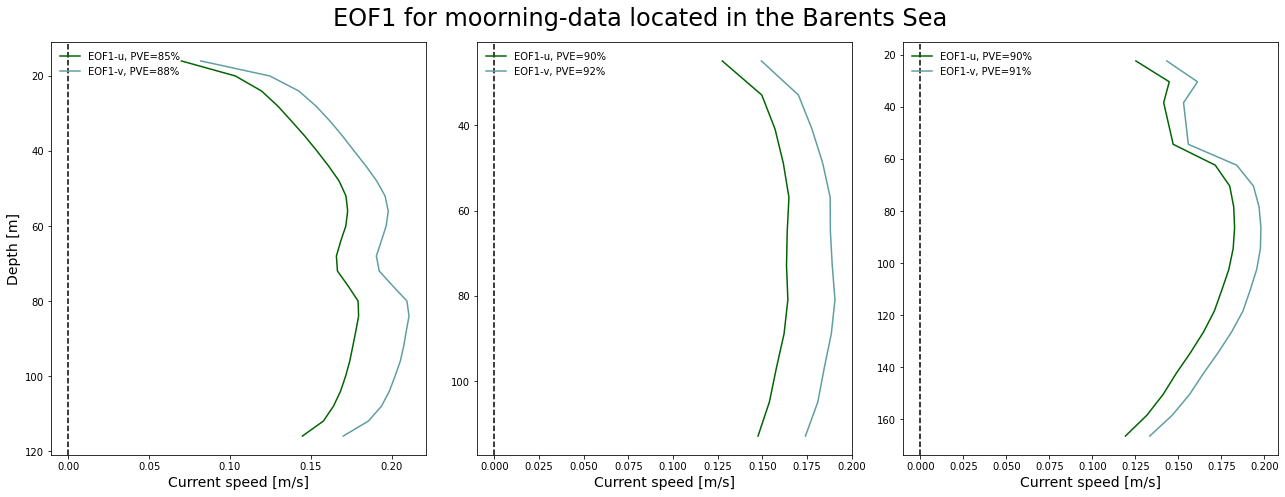

In [30]:
fig, axs = plt.subplots(1,3,figsize=(18,7))
bar = [(u13,v13),(u15,v15),(u17,v17)]
plt.suptitle('EOF1 for moorning-data located in the Barents Sea ', 
             horizontalalignment='center',
            fontsize=24)

axs[0].set_ylabel('Depth [m]', fontsize=14)

for axs, y in zip(axs.flat, bar):
    U =y[0]*10**(-2) # vel oppitt i cm/s --> vil ha m/s 
    V = y[1]*10**(-2)
    valu, vecu = PCz(U)
    valv, vecv = PCz(V)
    PVE1u = int(round(valu[0]/np.sum(valu)*100,0))
    PVE1v = int(round(valv[0]/np.sum(valv)*100,0))
    axs.plot(np.sqrt(valu[0])*vecu[:,0],U.DEPTH.isel(TIME=0), label= f'EOF1-u, PVE={PVE1u}%', color='darkgreen')
    axs.plot(np.sqrt(valv[0])*vecv[:,0],V.DEPTH.isel(TIME=0), label= f'EOF1-v, PVE={PVE1v}%', color='cadetblue')
    axs.axvline(0, color='k', linestyle = '--')
    axs.invert_yaxis()
    axs.set_xlabel('Current speed [m/s]', fontsize=14)
    axs.legend(frameon=False, fontsize=10, loc="upper left") 
fig.tight_layout()

plt.savefig('EOF_moor_barents.pdf', dpi = 300)

[ 0.27541674 -0.96132493]
[ 0.1863939 -0.9824751]
[ 0.42605245 -0.90469846]


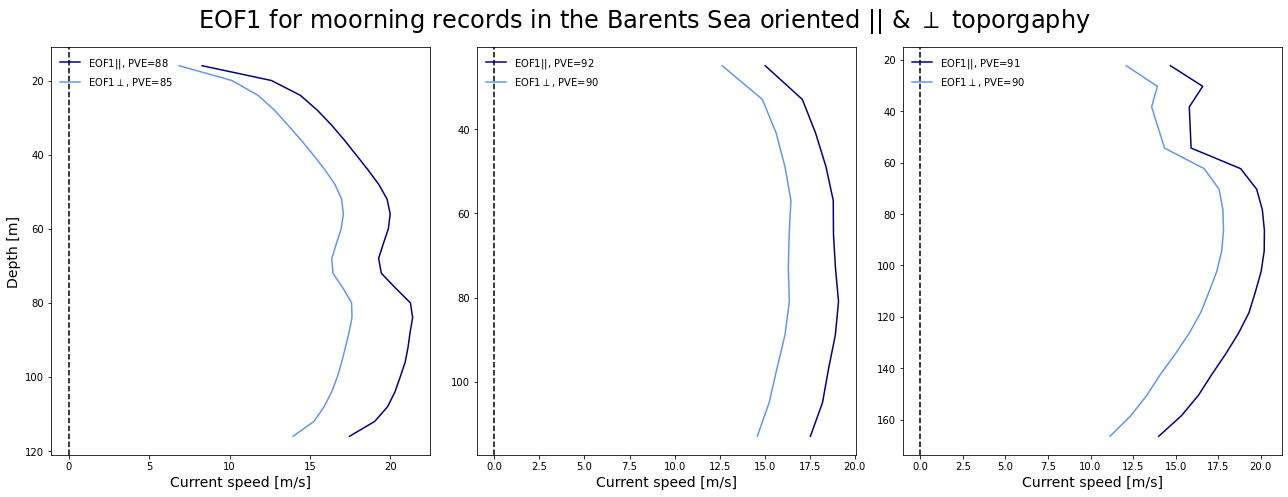

In [78]:
fig, axs = plt.subplots(1,3,figsize=(18,7))
nr = [0,1,2] 
plt.suptitle(f'EOF1 for moorning records in the Barents Sea oriented $||$ & $\perp$ toporgaphy', 
             horizontalalignment='center',
            fontsize=24)

axs[0].set_ylabel('Depth [m]', fontsize=14)

for axs, i in zip(axs.flat, range(len(nr))):
    U = vel_l[i][0]
    V = vel_l[i][1]
    vec = vec_l[i][:,0]
    
    print(vec)
    EOFp, EOFo, PVEp, PVEo, = PCz_op(U,V,vec)
    axs.plot(EOFp,U.DEPTH.isel(TIME=0), label= f'EOF1$||$, PVE={PVEp}', color='navy')
    axs.plot(EOFo,V.DEPTH.isel(TIME=0), label= f'EOF1$\perp$, PVE={PVEo}', color='cornflowerblue')
    axs.axvline(0, color='k', linestyle = '--')
    axs.invert_yaxis()
    axs.set_xlabel('Current speed [m/s]', fontsize=14)
    axs.legend(frameon=False, fontsize=10, loc="upper left") 
fig.tight_layout()

plt.savefig('EOF_Barents_moor_par_ort.pdf', dpi = 300)

In [89]:
U.DEPTH

<xarray.DataArray 'DEPTH' (DEPTH: 252)>
array([ 260.,  270.,  280., ..., 2750., 2760., 2770.])
Coordinates:
  * DEPTH    (DEPTH) float64 260.0 270.0 280.0 ... 2.75e+03 2.76e+03 2.77e+03
Attributes:
    standard_name:  Z
    units:          m
    long_name:      Vertical distance below the sea surface
    axis:           Z

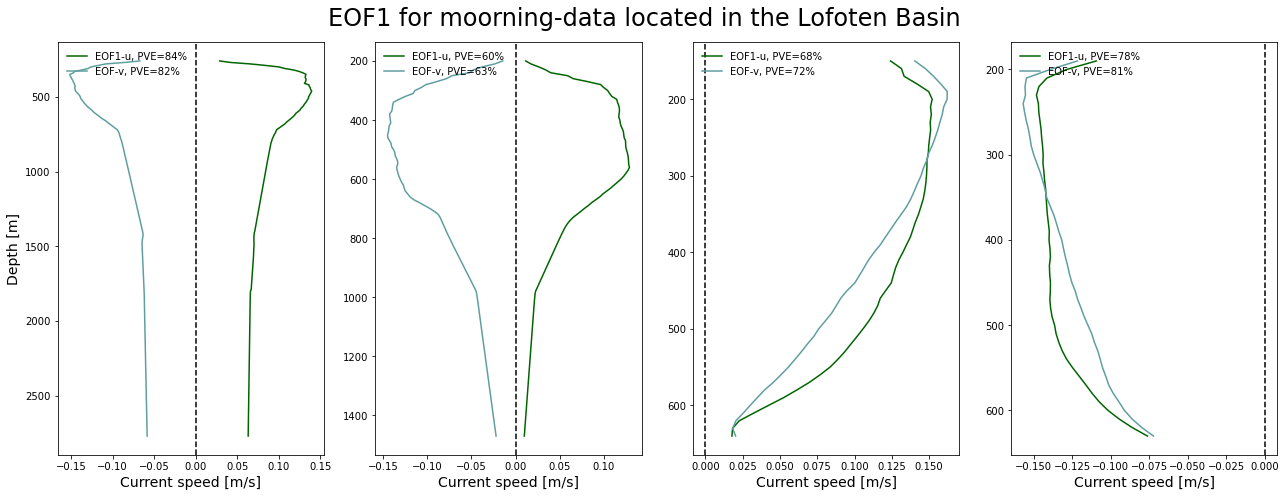

In [90]:
warnings.simplefilter("ignore")
fig, axs = plt.subplots(1,4,figsize=(18,7))
plt.suptitle('EOF1 for moorning-data located in the Lofoten Basin', 
             horizontalalignment='center',
            fontsize=24)
nr = [3,4,5,6]
axs[0].set_ylabel('Depth [m]', fontsize=14)

for axs, i in zip(axs.flat, range(4)):
    #for axs, p in zip(axes.flat, range(len((punkt_list)))):
    U =vel_l[i+3][0]
    V = vel_l[i+3][1]
    valu, vecu = PCz(U)
    valv, vecv = PCz(V)
    PVE1u = int(round(valu[0]/np.sum(valu)*100,0))
    PVE1v = int(round(valv[0]/np.sum(valv)*100,0))
    axs.plot(np.sqrt(valu[0])*vecu[:,0],U.DEPTH, label= f'EOF1-u, PVE={PVE1u}%', color='darkgreen')
    axs.plot(np.sqrt(valv[0])*vecv[:,0],V.DEPTH, label= f'EOF-v, PVE={PVE1v}%', color='cadetblue')
    axs.axvline(0, color='k', linestyle = '--')
    axs.invert_yaxis()
    axs.set_xlabel('Current speed [m/s]', fontsize=14)
    axs.legend(frameon=False, fontsize=10, loc="upper left")
fig.tight_layout()   

plt.savefig('EOF_moor_Lofoten.pdf', dpi = 300)

[ 0.86834446 -0.49596158]
[-0.58294305 -0.81251301]
[0.94829195 0.3173994 ]
[ 0.62741291 -0.77868674]


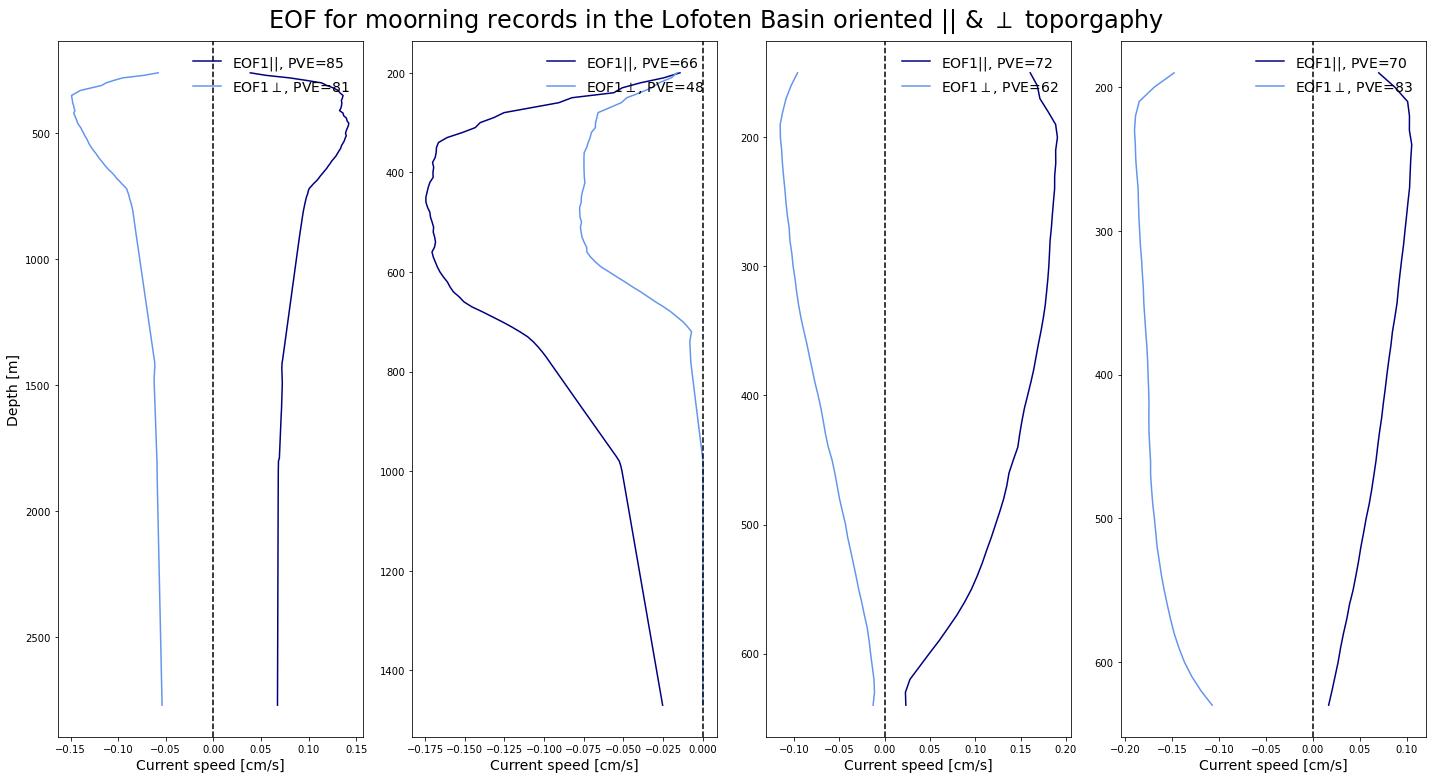

In [91]:
warnings.simplefilter("ignore")
fig, axs = plt.subplots(1,4,figsize=(20,11))
plt.suptitle('EOF for moorning records in the Lofoten Basin oriented $||$ & $\perp$ toporgaphy', 
             horizontalalignment='center',
            fontsize=24)

axs[0].set_ylabel('Depth [m]', fontsize=14)

for axs, i in zip(axs.flat, range(4)):
    U =vel_l[i+3][0]
    V = vel_l[i+3][1]
    vec = vec_l[i+3][:,0]
    print(vec)

    EOFp, EOFo, PVEp, PVEo, = PCz_op(U,V,vec)
    axs.plot(EOFp,U.DEPTH, label= f'EOF1$||$, PVE={PVEp}', color='navy')
    axs.plot(EOFo,V.DEPTH, label= f'EOF1$\perp$, PVE={PVEo}', color='cornflowerblue')
    axs.axvline(0, color='k', linestyle = '--')
    axs.invert_yaxis()
    axs.set_xlabel('Current speed [cm/s]', fontsize=14)
    axs.legend(frameon=False, fontsize=14, loc="upper right")
fig.tight_layout()

plt.savefig('PC1_Lofoten_par_ort.pdf', dpi = 300)

In [53]:
def PCz_yermark(data):
    cov = np.cov(data, bias=True) # uten .T ble den en 73x73 matrise     
    values, vectors = np.linalg.eig(cov)
    order = values.argsort()[::-1]
    values, vectors = values[order], vectors[:, order]
    
    return  values, vectors

In [ ]:
fig, axs = plt.subplots(1,3,figsize=(20,11))
plt.suptitle('EOF for moorning-data located at Yermark shelf', 
             horizontalalignment='center',
            fontsize=24)

axs[0].set_ylabel('Depth [m]', fontsize=14)

for axs, i in zip(axs.flat, range(3)):
    U =vel_l[i+7][0]
    V = vel_l[i+7][1]
    valu, vecu = PCz(U.T)
    valv, vecv = PCz(V.T)
    PVE1u = int(round(valu[0]/np.sum(valu)*100,0))
    PVE1v = int(round(valv[0]/np.sum(valv)*100,0))
    axs.plot(np.sqrt(valu[0])*vecu[:,0],U.DEPTH, label= f'EOF1-u, PVE={PVE1u}%', color='darkgreen')
    axs.plot(np.sqrt(valv[0])*vecv[:,0],V.DEPTH, label= f'EOF-v, PVE={PVE1v}%', color='cadetblue')
    axs.axvline(0, color='k', linestyle = '--')
    axs.invert_yaxis() 
    axs.set_xlabel('Current speed [m/s]', fontsize=14)
    axs.legend(frameon=False, fontsize=10, loc="upper left") 
fig.tight_layout()

plt.savefig('EOF_moor_Yermark.pdf', dpi = 300)

In [ ]:
fig, axs = plt.subplots(1,3,figsize=(20,11))
plt.suptitle('EOF for moorning records at Yermark shelf oriented $||$ & $\perp$ toporgaphy', 
             horizontalalignment='center',
            fontsize=24)
axs[0].set_ylabel('Depth [m]', fontsize=14)

for axs, i in zip(axs.flat, range(3)):
    y = vel_l[i+10][i]
    U =vel_l[i+10][0]
    vec = vec_l[i+10][:,0]
   
    PC1p, PC1o, PVE1p, PVE1o = PCz_op(U.T,V.T,vec)
    axs.plot(PC1p,U.DEPTH, label= f'EOF1$||$, PVE={PVE1p}', color='navy')
    axs.plot(PC1o,V.DEPTH, label= f'EOF1$\perp$, PVE={PVE1o}', color='cornflowerblue')
    axs.axvline(0, color='k', linestyle = '--')
    axs.invert_yaxis()
    axs.set_xlabel('Current speed [m/s]', fontsize=14)
    axs.legend(frameon=False, fontsize=14, loc="upper left") 
fig.tight_layout()

plt.savefig('PC1_Yermark_par_ort.pdf', dpi = 300)

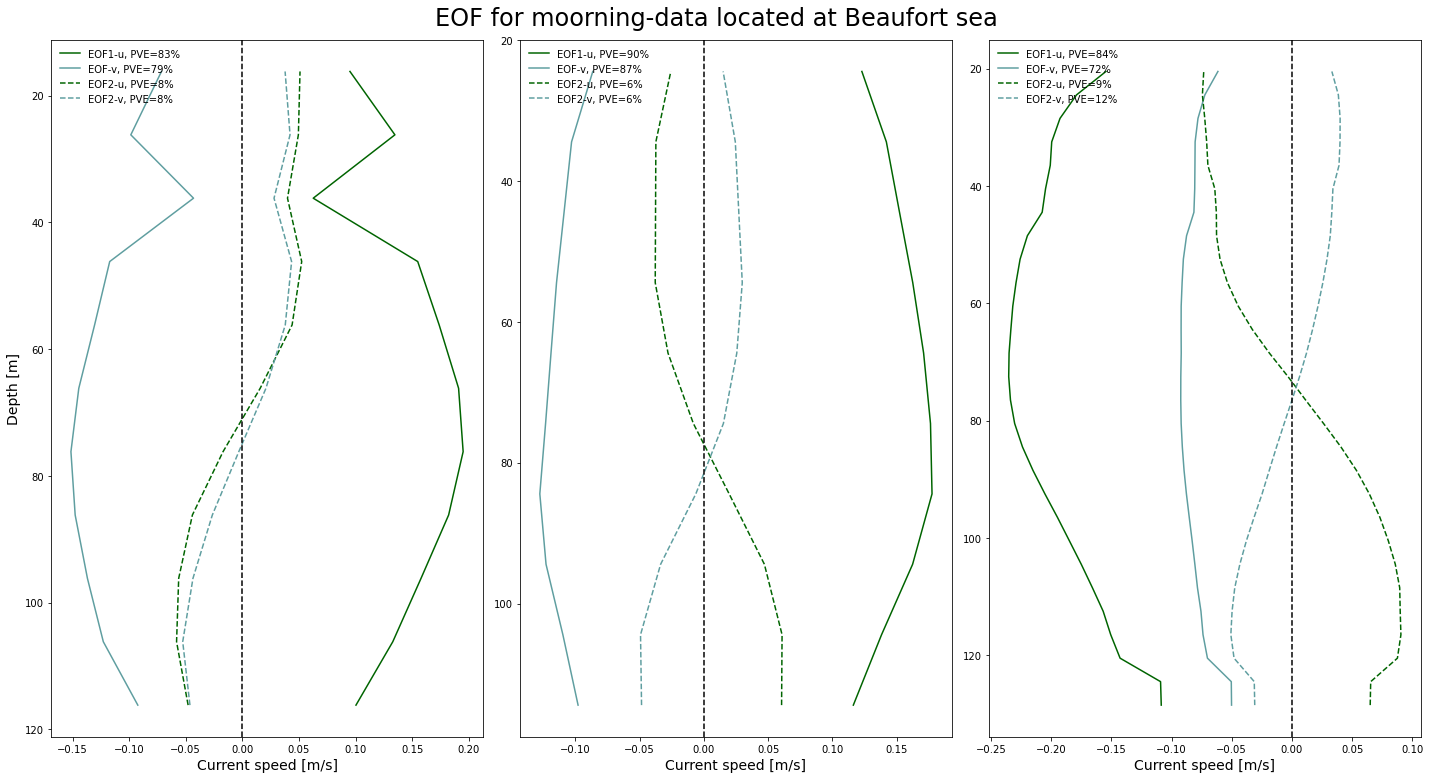

In [56]:
fig, axs = plt.subplots(1,3,figsize=(20,11))
plt.suptitle('EOF for moorning-data located at Beaufort sea', 
             horizontalalignment='center',
            fontsize=24)

axs[0].set_ylabel('Depth [m]', fontsize=14)

for axs, y in zip(axs.flat, range(3)):
    #for axs, p in zip(axes.flat, range(len((punkt_list)))):
    U = vel_l[i+14][0]
    V = vel_l[i+14][1]
    valu, vecu = PCz(U)
    valv, vecv = PCz(V)
    PVE1u = int(round(valu[0]/np.sum(valu)*100,0))
    PVE1v = int(round(valv[0]/np.sum(valv)*100,0))
    axs.plot(np.sqrt(valu[0])*vecu[:,0],U.BINDEPTH, label= f'EOF1-u, PVE={PVE1u}%', color='darkgreen')
    axs.plot(np.sqrt(valv[0])*vecv[:,0],V.BINDEPTH, label= f'EOF-v, PVE={PVE1v}%', color='cadetblue')
    axs.axvline(0, color='k', linestyle = '--')
    axs.invert_yaxis() 
    axs.set_xlabel('Current speed [m/s]', fontsize=14)
    axs.legend(frameon=False, fontsize=10, loc="upper left") 
fig.tight_layout()

plt.savefig('EOF_moor_Beaufort.pdf', dpi = 300)

In [ ]:
fig, axs = plt.subplots(1,4,figsize=(20,11))
plt.suptitle('EOF for moorning records at Beaufort sea oriented $||$ & $perp$ toporgaphy', 
             horizontalalignment='center',
            fontsize=24)

axs[0].set_ylabel('Depth [m]', fontsize=14)

for axs, i in zip(axs.flat, range(4)):
    U = vel_l[i+14][0]
    V = vel_l[i+14][1]
    vec = vec_l[i+14][:,0]
    PC1p, PC1o, PVE1p, PVE1o = PCz_op(U,V,vec)
    axs.plot(PC1p,U.BINDEPTH, label= f'EOF1$||$, PVE={PVE1p}', color='navy')
    axs.plot(PC1o,V.BINDEPTH, label= f'EOF1$\perp$, PVE={PVE1o}', color='cornflowerblue')
    axs.axvline(0, color='k', linestyle = '--')
    axs.invert_yaxis() 
    axs.set_xlabel('Current speed [m/s]', fontsize=14)
    axs.legend(frameon=False, fontsize=14, loc="upper left") 
fig.tight_layout()

plt.savefig('PC1_Beaufort_par_ort.pdf', dpi = 300)